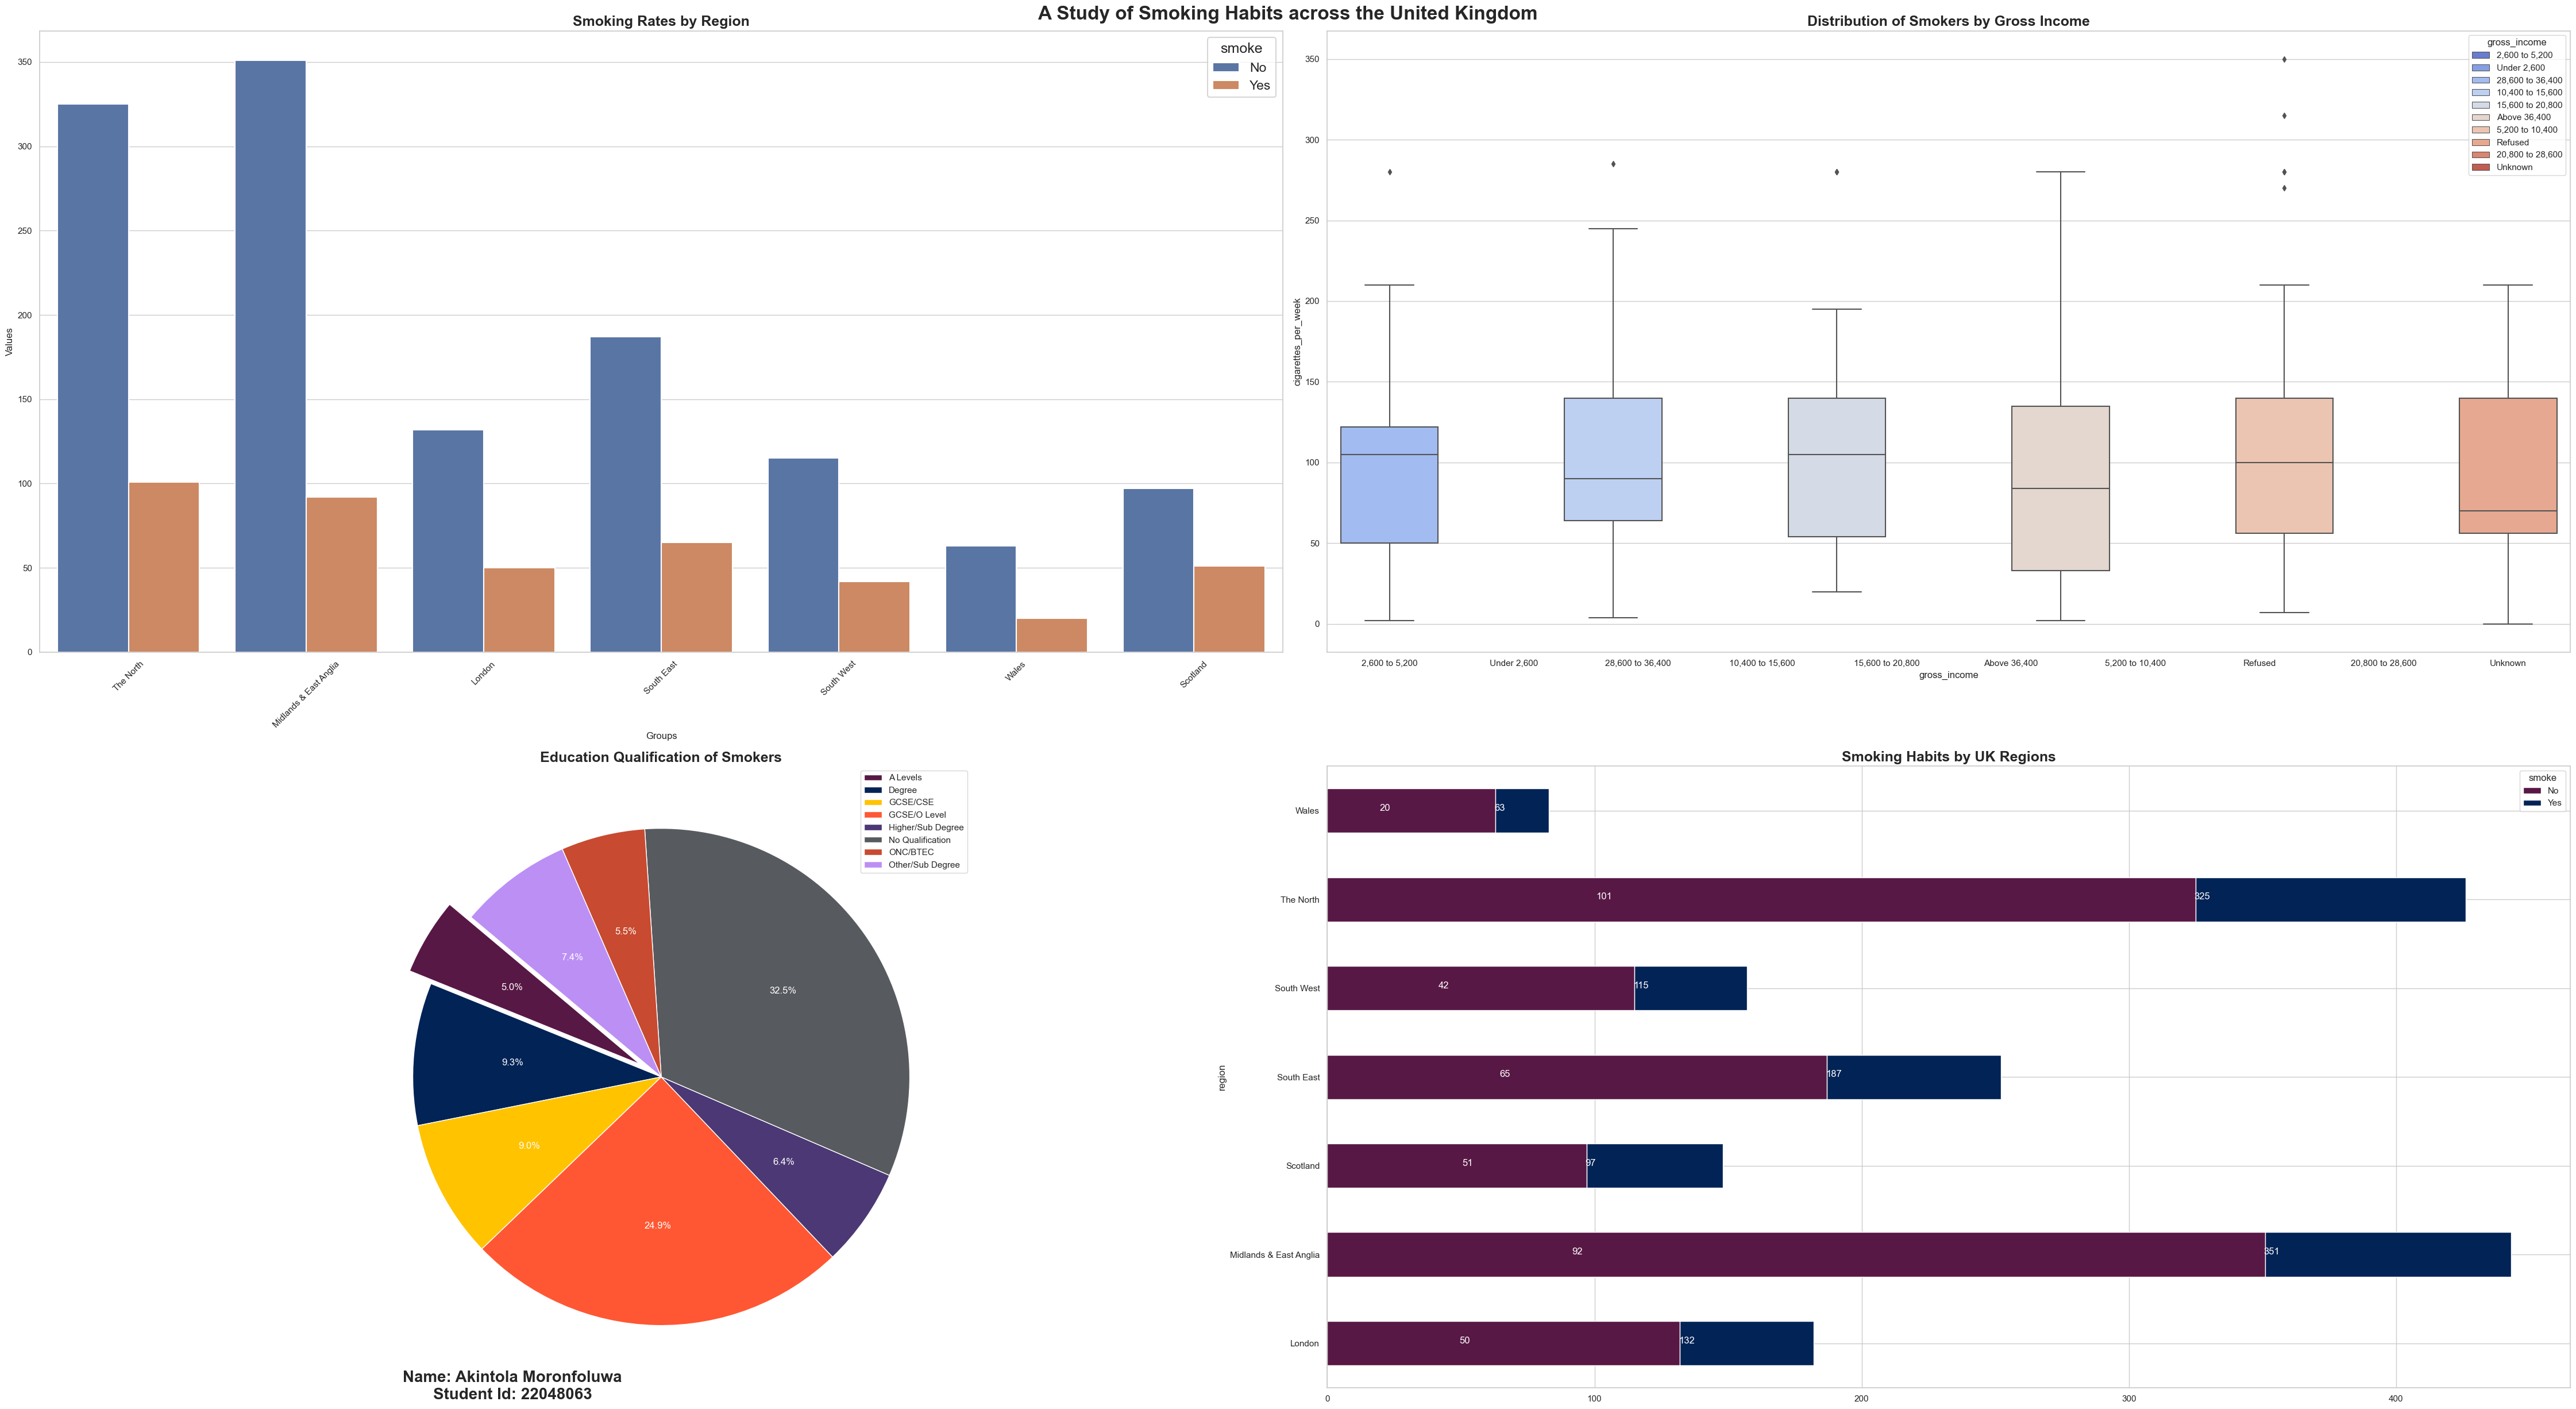

In [51]:
#!/usr/bin/python3

"""
    Name: Akintola Moronfoluwa
    Student Id: 22048063
    Github repo: https://github.com/Foluwa/7PAM2004_assigment_infographics
    Datasets: https://www.kaggle.com/datasets/utkarshx27/smoking-dataset-from-uk
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_bar(df, ax):
    """ Plot 1 - Bar Plot """
    sns.set_context("talk") 
    sns.countplot(x="region", data=df, ax=ax, hue='smoke')

    # Rotate x-tick labels  
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set(xlabel="Groups", ylabel="Values")
    return ax


def plot_box(df, ax):
    """ Plot 2 - Box Plot """
    df['amt_weekends'] = pd.to_numeric(df['amt_weekends'], errors='coerce')
    df['amt_weekdays'] = pd.to_numeric(df['amt_weekdays'], errors='coerce')
    df['cigarettes_per_week'] = df['amt_weekends'] * 2 + df['amt_weekdays'] * 5

    # Create the box plots
    sns.set_context("talk") 
    sns.set(style='whitegrid')
    sns.boxplot(x="gross_income", y="cigarettes_per_week", hue="gross_income", data=df, palette="coolwarm", ax=ax, width=8)
    return ax


def plot_pie(df, ax):
    """ Plot 3 - Pie Chart """ 
    qualifications = df.groupby(['highest_qualification', 'smoke']).size().unstack().fillna(0)
    labels = qualifications.index
    num_qualifications = len(qualifications.index)

    # Define colors, labels, and explode
    explode = tuple([0.1] + [0]*(num_qualifications-1))
    labels = qualifications.index

    # Pie chart for smokers
    p1 = ax.pie(qualifications['Yes'], labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, textprops={'color':'white'})
    ax.set_title('Highest Qualification of Smokers')

    # Adding legend to the top right corner
    ax.legend(p1[0], labels, loc='upper right')
    return ax


def plot_barh(df, ax):
    """ Plot 4 - Horizontal Bar Plot  """
    smoke_by_region = df.groupby(['region', 'smoke']).size().unstack().fillna(0)
    smoke_by_region.plot(ax=ax, kind='barh', stacked=True, color=colors)
    for i, v in enumerate(smoke_by_region.columns):
        totals = smoke_by_region.iloc[:, i]
        for j in range(len(totals)):
            ax.text(totals.iloc[j] - 0.5, j, str(totals.iloc[j]), color='w')
    return ax

if __name__ == "__main__":

    # Load data from CSV
    df = pd.read_csv('./smoking.csv')

    # Define details and colors
    details = """Name: Akintola Moronfoluwa\nStudent Id: 22048063"""
    colors = ['#581845', '#022356', '#FFC300', '#FF5733', '#4B3874', '#575A5F', '#C84A30', '#BC8FF5', '#0BA2E8', '#386174']

    # Create chart figure and axes
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(45, 25))


    # Plot 4 charts in order
    plot_bar(df, ax1)
    plot_box(df, ax2)
    plot_pie(df, ax3)
    plot_barh(df, ax4)

    # Set titles for each chart
    ax1.set_title('Smoking Rates by Region', weight='bold', size=18)  
    ax2.set_title('Distribution of Smokers by Gross Income', weight='bold', size=18)
    ax3.set_title('Education Qualification of Smokers', weight='bold', size=18)
    ax4.set_title('Smoking Habits by UK Regions', weight='bold', size=18)

    # Set Infographics Title 
    fig.suptitle('A Study of Smoking Habits across the United Kingdom', weight='bold', size=24)

    # Add Student details text at bottom of chart  
    fig.text(0.2, 0.01, details, ha='center', weight='bold', size=20)

    # Adjust layout 
    fig.tight_layout()  

    # Save infographics Visualisation in PNG format, 300 dpi
    fig.savefig('22048063.png', format='png', dpi=300)
